In [1]:
import os
import sys
import numpy as np
from pathlib import Path
import pandas as pd
import cv2
from pydicom import dcmread
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))
from src.utils.utils import get_angles_labels, get_glcm_features, load_json, load_inbreast_mask, get_first_order_features

# Extrair caracteristicas matriz GLCM

In [2]:
path_json = "D:\\mathe\\Documents\\PythonNotebooks\\Radiomica\\outputs\\mamografia\\extracted_metadata"

angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
distances = [1]

### CMMD

In [3]:
name_json = "extracted_metadata_CMMD"

list_metadata = load_json(name_json, path_json)
glcm_features = []
labels = []
image_paths = []

for metadata in list_metadata:
    metadata_csv = metadata['metadata_csv']
    
    tmp_path = "/".join(metadata_csv['image_path'][0].split("/")[:-1])  # noqa: E501
    directory = Path(tmp_path)
    paths_dicom_file = list(directory.rglob("*.dcm*"))
    
    for path_dicom_file in paths_dicom_file:
        dicom_file = dcmread(path_dicom_file)
        image_paths.append(path_dicom_file)
        
        labels.append(metadata_csv['classification'].lower())
        
        # Carrega a matriz da imagem original
        image = dicom_file.pixel_array
        image = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8)).apply(image)
        image = image.astype(np.uint8)

        # Redimensiona a imagem original e salva no array
        if image.max() > 256:
            image = cv2.convertScaleAbs(image)

        # image = cv2.equalizeHist(image)
        features = get_glcm_features(image, distances, angles, 256, True, True, properties)
        glcm_features.append(features)

columns = []
angles_labels = get_angles_labels(angles)

for name in properties:
    for distance in distances:
        for ang in angles_labels:
            columns.append(name + "_ang_" + ang + "_dist_" + str(distance))

glcm_df_CMMD = pd.DataFrame(glcm_features, columns=columns)
glcm_df_CMMD['pathology'] = labels
glcm_df_CMMD['image_path'] = image_paths
glcm_df_CMMD.to_csv("../../outputs/mamografia/matriz_glcm_features/matriz_features_glcm_CMMD.csv", index=False)
glcm_df_CMMD.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,correlation_ang_0_dist_1,correlation_ang_45_dist_1,correlation_ang_90_dist_1,correlation_ang_135_dist_1,homogeneity_ang_0_dist_1,homogeneity_ang_45_dist_1,...,ASM_ang_0_dist_1,ASM_ang_45_dist_1,ASM_ang_90_dist_1,ASM_ang_135_dist_1,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,pathology,image_path
0,1.401478,1.584981,1.409078,1.579834,0.981471,0.976542,0.981196,0.976709,0.924791,0.923726,...,0.801584,0.801442,0.801499,0.801430,0.895312,0.895233,0.895265,0.895226,Benign,D:\mathe\Documents\BancoDados_IC\Mamografia\CM...
1,4.272694,4.733602,4.155909,4.734320,0.961329,0.952809,0.963024,0.953210,0.828679,0.827749,...,0.629842,0.629866,0.629953,0.629686,0.793626,0.793641,0.793696,0.793528,Benign,D:\mathe\Documents\BancoDados_IC\Mamografia\CM...
2,2.381248,2.693172,2.383126,2.690759,0.975443,0.969145,0.975320,0.969153,0.889254,0.888112,...,0.735523,0.735409,0.735407,0.735360,0.857626,0.857560,0.857559,0.857532,Benign,D:\mathe\Documents\BancoDados_IC\Mamografia\CM...
3,4.292163,4.862871,4.215584,4.810517,0.972562,0.965379,0.973206,0.965879,0.796217,0.792396,...,0.572562,0.572352,0.572879,0.572615,0.756678,0.756540,0.756888,0.756713,Benign,D:\mathe\Documents\BancoDados_IC\Mamografia\CM...
4,4.498850,5.149871,4.509829,5.122565,0.969671,0.960778,0.969622,0.961236,0.799565,0.797102,...,0.572282,0.572052,0.572098,0.572055,0.756493,0.756341,0.756372,0.756343,Benign,D:\mathe\Documents\BancoDados_IC\Mamografia\CM...


### CBIS-DDSM 

In [4]:
name_json = "extracted_metadata_CBIS-DDSM"

list_metadata = load_json(name_json, path_json)
glcm_features = []
labels = []
image_paths = []

for metadata in list_metadata:
    metadata_csv = metadata['metadata_csv']
    
    directory = Path(metadata_csv['original_image_path'])
    paths_dicom_file = list(directory.rglob("*.dcm*"))
    
    for path_dicom_file in paths_dicom_file:
        dicom_file = dcmread(path_dicom_file)
        image_paths.append(path_dicom_file)
        
        labels.append(metadata_csv['pathology'].lower())
        
        # Carrega a matriz da imagem original
        image = dicom_file.pixel_array
        image = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8)).apply(image)
        image = image.astype(np.uint8)

        # Redimensiona a imagem original e salva no array
        if image.max() > 256:
            image = cv2.convertScaleAbs(image)

        # image = cv2.equalizeHist(image)
        features = get_glcm_features(image, distances, angles, 256, True, True, properties)
        glcm_features.append(features)

columns = []
angles_labels = get_angles_labels(angles)

for name in properties:
    for distance in distances:
        for ang in angles_labels:
            columns.append(name + "_ang_" + ang + "_dist_" + str(distance))

glcm_df_CBIS_DDSM = pd.DataFrame(glcm_features, columns=columns)
glcm_df_CBIS_DDSM['pathology'] = labels
glcm_df_CBIS_DDSM['image_path'] = image_paths
glcm_df_CBIS_DDSM.to_csv("../../outputs/mamografia/matriz_glcm_features/matriz_features_glcm_CBIS-DDSM.csv", index=False)
glcm_df_CBIS_DDSM.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,correlation_ang_0_dist_1,correlation_ang_45_dist_1,correlation_ang_90_dist_1,correlation_ang_135_dist_1,homogeneity_ang_0_dist_1,homogeneity_ang_45_dist_1,...,ASM_ang_0_dist_1,ASM_ang_45_dist_1,ASM_ang_90_dist_1,ASM_ang_135_dist_1,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,pathology,image_path
0,27.009180,27.000381,26.997913,27.004709,0.637209,0.637464,0.637588,0.637391,0.691806,0.690986,...,0.468115,0.468084,0.468102,0.468049,0.684189,0.684167,0.684180,0.684141,BENIGN,D:\mathe\Documents\BancoDados_IC\Mamografia\CB...
1,41.841295,41.861561,41.824018,41.869624,0.570106,0.569805,0.570151,0.569621,0.519707,0.518718,...,0.258550,0.258338,0.258458,0.258334,0.508478,0.508270,0.508387,0.508265,BENIGN,D:\mathe\Documents\BancoDados_IC\Mamografia\CB...
2,26.617607,26.664090,26.613446,26.643918,0.637536,0.636592,0.637693,0.636972,0.695777,0.695479,...,0.477381,0.477214,0.477243,0.477141,0.690928,0.690806,0.690828,0.690754,BENIGN_WITHOUT_CALLBACK,D:\mathe\Documents\BancoDados_IC\Mamografia\CB...
3,26.617607,26.664090,26.613446,26.643918,0.637536,0.636592,0.637693,0.636972,0.695777,0.695479,...,0.477381,0.477214,0.477243,0.477141,0.690928,0.690806,0.690828,0.690754,BENIGN_WITHOUT_CALLBACK,D:\mathe\Documents\BancoDados_IC\Mamografia\CB...
4,38.929161,38.936617,38.901745,38.952591,0.586626,0.586553,0.587084,0.586267,0.553010,0.552639,...,0.295692,0.295639,0.295745,0.295598,0.543776,0.543727,0.543825,0.543689,BENIGN_WITHOUT_CALLBACK,D:\mathe\Documents\BancoDados_IC\Mamografia\CB...


### INBREAST

In [8]:
name_json = "extracted_metadata_INBREAST"

list_metadata = load_json(name_json, path_json)
glcm_features = []
labels = []
image_paths = []

for metadata in list_metadata:
    metadata_csv = metadata['metadata_csv']
    
    paths_dicom_file = [metadata_csv['cropped_image_path']]
    
    for path_dicom_file in paths_dicom_file:
        #dicom_file = dcmread(path_dicom_file)
        
        label = metadata_csv['bi-rads'].replace("4a", "3").replace("4b", "3").replace("4c", "5")  # noqa: E501
        label = int(label)
        
        if label == 0:
            label = 'incloclusive'
        elif label == 1:
            label = 'normal'
        elif label < 4:
            label = 'benign'
        else:
            label = 'malignant'
        
        # Carrega a matriz da imagem original
        # image = dicom_file.pixel_array
        
        if label not in ['benign', 'malignant']:
            continue      
         
        image = load_inbreast_mask(path_dicom_file)
        image_paths.append(path_dicom_file)
        labels.append(label)
        
        # Redimensiona a imagem original e salva no array
        if image.max() > 256:
            image = cv2.convertScaleAbs(image)

        image = image.astype(np.uint8)
        #image = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8)).apply(image)

        #image = cv2.equalizeHist(image)
        features = get_glcm_features(image, distances, angles, 256, True, True, properties)
        glcm_features.append(features)

columns = []
angles_labels = get_angles_labels(angles)

for name in properties:
    for distance in distances:
        for ang in angles_labels:
            columns.append(name + "_ang_" + ang + "_dist_" + str(distance))

glcm_df_INBREAST = pd.DataFrame(glcm_features, columns=columns)
glcm_df_INBREAST['pathology'] = labels
glcm_df_INBREAST['image_path'] = image_paths
glcm_df_INBREAST.to_csv("../../outputs/mamografia/matriz_glcm_features/matriz_features_glcm_INBREAST.csv", index=False)
glcm_df_INBREAST.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,correlation_ang_0_dist_1,correlation_ang_45_dist_1,correlation_ang_90_dist_1,correlation_ang_135_dist_1,homogeneity_ang_0_dist_1,homogeneity_ang_45_dist_1,...,ASM_ang_0_dist_1,ASM_ang_45_dist_1,ASM_ang_90_dist_1,ASM_ang_135_dist_1,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,pathology,image_path
0,0.000049,0.000066,0.000046,0.000069,0.995230,0.993520,0.995503,0.993261,0.999976,0.999967,...,0.989706,0.989686,0.989710,0.989684,0.994840,0.994830,0.994842,0.994829,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/IN...
1,0.000031,0.000055,0.000046,0.000055,0.996506,0.993771,0.994834,0.993771,0.999985,0.999973,...,0.991143,0.991117,0.991123,0.991117,0.995562,0.995549,0.995551,0.995549,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/IN...
2,0.000085,0.000122,0.000089,0.000127,0.994538,0.992134,0.994245,0.991840,0.999958,0.999939,...,0.984365,0.984324,0.984362,0.984319,0.992152,0.992131,0.992150,0.992129,malignant,D:/mathe/Documents/BancoDados_IC/Mamografia/IN...
3,0.000006,0.000008,0.000007,0.000009,0.950234,0.934830,0.946679,0.926536,0.999997,0.999996,...,0.999870,0.999868,0.999869,0.999867,0.999935,0.999934,0.999935,0.999933,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/IN...
4,0.000096,0.000151,0.000106,0.000135,0.994432,0.991198,0.993823,0.992116,0.999952,0.999924,...,0.982747,0.982687,0.982737,0.982703,0.991336,0.991306,0.991331,0.991314,malignant,D:/mathe/Documents/BancoDados_IC/Mamografia/IN...


### MIAS

In [3]:
name_json = "extracted_metadata_MIAS"

list_metadata = load_json(name_json, path_json)
glcm_features = []
first_order_features = []
first_order_features_labels = ['mean', 'std', 'variance', 'skewness', 'kurtosis']
labels = []
image_paths = []

for metadata in list_metadata:
    metadata_txt = metadata['metadata_txt']
    
    if 'classification' not in metadata_txt.keys() or 'cropped_image_path' not in metadata_txt.keys():
        continue
        
    image_path = metadata_txt['cropped_image_path']
    image_paths.append(image_path)
    labels.append(metadata_txt['classification'].lower())
    
    # Carrega a matriz da imagem original
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # image = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8)).apply(image)
    image = image.astype(np.uint8)
    
    first_order_features.append(get_first_order_features(image))

    # Redimensiona a imagem original e salva no array
    if image.max() > 256:
        image = cv2.convertScaleAbs(image)

    features = get_glcm_features(image, distances, angles, 256, True, True, properties)
    glcm_features.append(features)

columns = []
angles_labels = get_angles_labels(angles)

for name in properties:
    for distance in distances:
        for ang in angles_labels:
            columns.append(name + "_ang_" + ang + "_dist_" + str(distance))

first_order_df = pd.DataFrame(first_order_features, columns=first_order_features_labels)
glcm_df_MIAS = pd.DataFrame(glcm_features, columns=columns)
glcm_df_MIAS = pd.concat([first_order_df, glcm_df_MIAS], axis=1)
glcm_df_MIAS['pathology'] = labels
glcm_df_MIAS['image_path'] = image_paths
glcm_df_MIAS.to_csv("../../outputs/mamografia/matriz_glcm_features/matriz_features_glcm_MIAS.csv", index=False)
glcm_df_MIAS.head()

,mean,std,variance,skewness,kurtosis,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,correlation_ang_0_dist_1,...,ASM_ang_0_dist_1,ASM_ang_45_dist_1,ASM_ang_90_dist_1,ASM_ang_135_dist_1,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,pathology,image_path
0,14.322021,2015.904801,44.898829,3.159012,8.732031,0.267175,0.368955,0.280901,0.328438,0.998017,...,0.781201,0.780730,0.781198,0.780718,0.883856,0.883589,0.883854,0.883582,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/MI...
1,0.449940,20.642355,4.543386,11.836357,152.100720,0.026924,0.031118,0.021603,0.031783,0.982232,...,0.971613,0.971480,0.971709,0.971467,0.985704,0.985637,0.985753,0.985630,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/MI...
2,0.296865,33.218093,5.763514,19.652562,389.309311,0.017114,0.023210,0.017486,0.023137,0.978919,...,0.994505,0.994454,0.994505,0.994454,0.997249,0.997223,0.997249,0.997223,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/MI...
3,0.296865,33.218093,5.763514,19.652562,389.309311,0.017114,0.023210,0.017486,0.023137,0.978919,...,0.994505,0.994454,0.994505,0.994454,0.997249,0.997223,0.997249,0.997223,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/MI...
4,0.508687,80.288554,8.960388,17.761044,316.935426,0.026452,0.035389,0.025853,0.035357,0.982192,...,0.993375,0.993319,0.993375,0.993319,0.996682,0.996654,0.996682,0.996654,benign,D:/mathe/Documents/BancoDados_IC/Mamografia/MI...


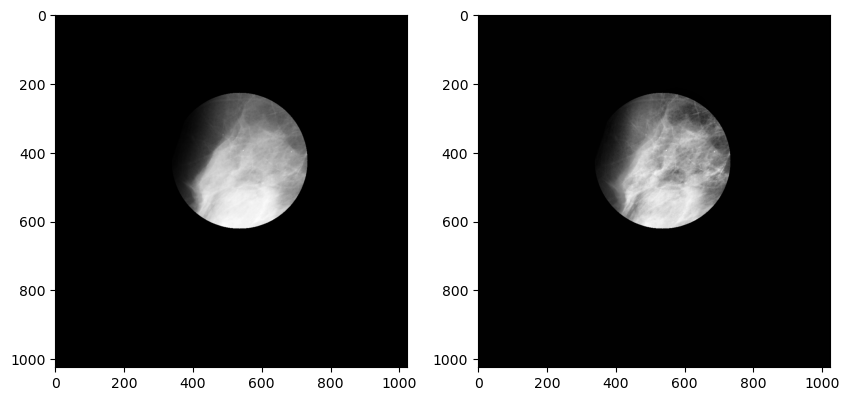

In [ ]:
image_path = "D:\\mathe\\Documents\\BancoDados_IC\\Mamografia\\MIAS\\all-roi\\mdb001.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(image)
clahe = cv2.createCLAHE(clipLimit=2.3, tileGridSize=(8,8)).apply(image)
image = image.astype(np.uint8)

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(image, cmap='gray')
ax = plt.subplot(1, 2, 2)
ax.imshow(clahe, cmap='gray')
plt.show()